# Parker Solar Probe Examples

In [1]:
from utils.io import load_psp_data
from pytplot import tplot, tlimit, timebar
from utils.config import PSPConfig

In [3]:
tnames = load_psp_data()

0 : psp_fld_l2_mag_RTN_4_Sa_per_Cyc
1 : psp_swp_spi_sf00_L3_DENS
2 : psp_swp_spi_sf00_L3_VEL_RTN_SUN
3 : psp_swp_spi_sf00_L3_VEL_RTN
4 : psp_swp_spi_af00_L3_DENS
5 : psp_swp_spi_af00_L3_VEL_RTN_SUN
6 : psp_swp_spi_af00_L3_VEL_RTN
7 : Tp_spani_b
8 : Tp_spanib_b


In [5]:
import polars as pl
  
def find_events(df: pl.DataFrame):
    return df.with_columns(
        Λ_t = 1 - (pl.col("v.ion.change.l") / pl.col("v.Alfven.change.l")) ** 2
    ).with_columns(
        rate =  (pl.col("Λ_ion") / pl.col("Λ_t") - 1).abs()
    ).sort("rate")
    
p_conf = PSPConfig(enc=7).load()
events = find_events(p_conf.events)

In [6]:
def time_stamp(ts):
    "Return POSIX timestamp as float."
    import pandas as pd

    return pd.Timestamp(ts, tz="UTC").timestamp()

In [7]:

def plot_event(event, tnames2plot, td_stop_c = "t.d_end", add_timebars = True):
    tstart = time_stamp(event["tstart"])
    tstop = time_stamp(event["tstop"])
    td_start = event["t.d_start"]
    td_stop = event[td_stop_c]
    
    tlimit([tstart,tstop])

    if add_timebars:
        timebar(time_stamp(td_start))
        timebar(time_stamp(td_stop))

    tplot(tnames2plot)

In [13]:
from discontinuitypy.utils.plot import plot_candidate
from pytplot import get_data

def plot_candidate_tplot(event, name= 'psp_fld_l2_mag_RTN_4_Sa_per_Cyc'):
    da = get_data(name, xarray=True)
    return plot_candidate(event, da)

In [20]:
tnames2plot = [
    'psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
    'psp_swp_spi_sf00_L3_DENS',
    'psp_swp_spi_af00_L3_VEL_RTN_SUN',
    'Tp_spani_b'
]

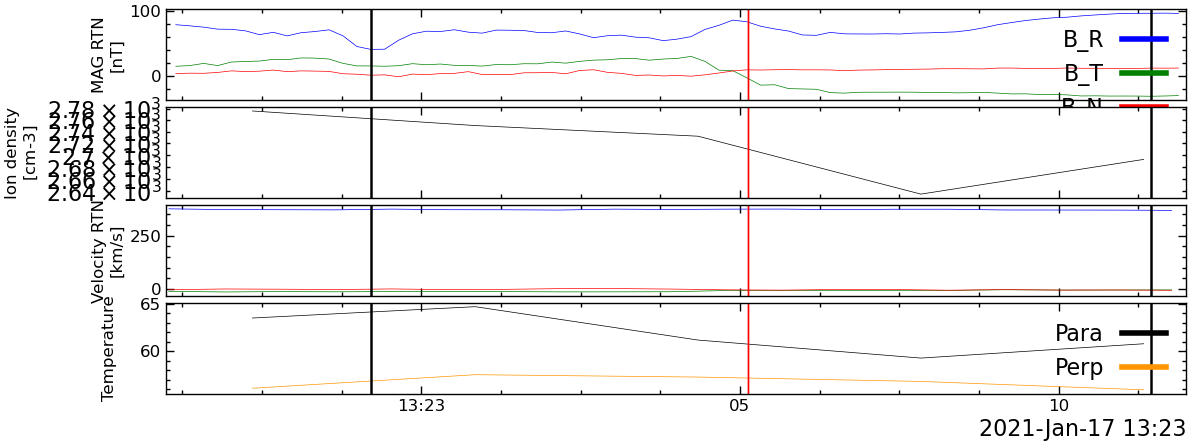

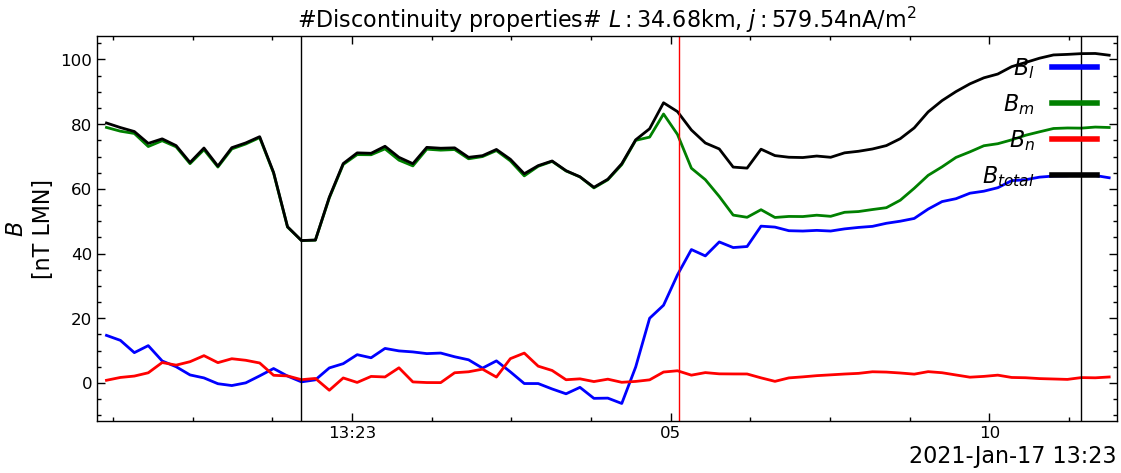

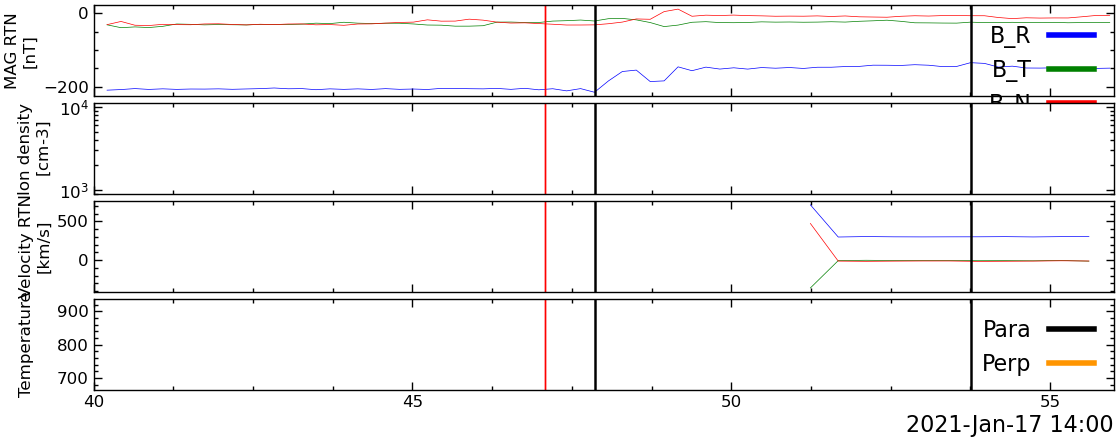

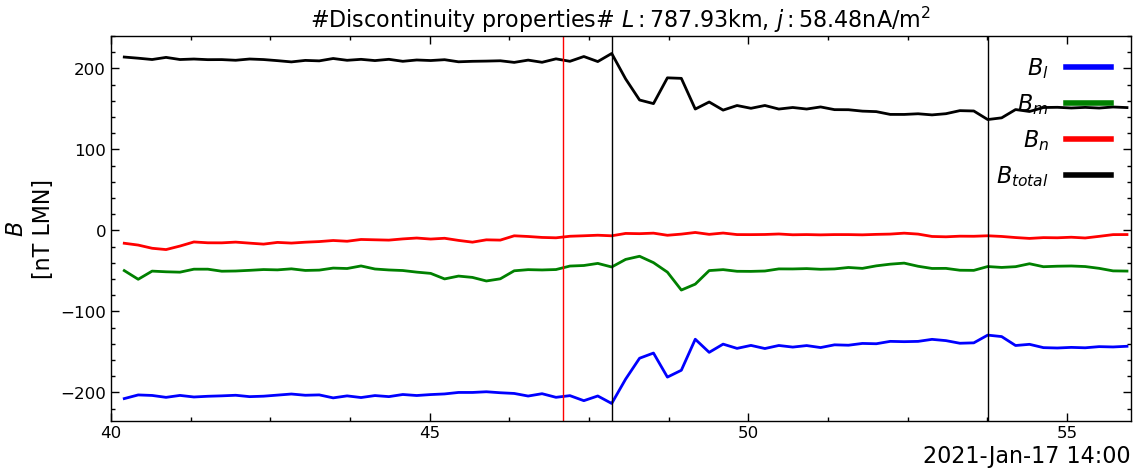

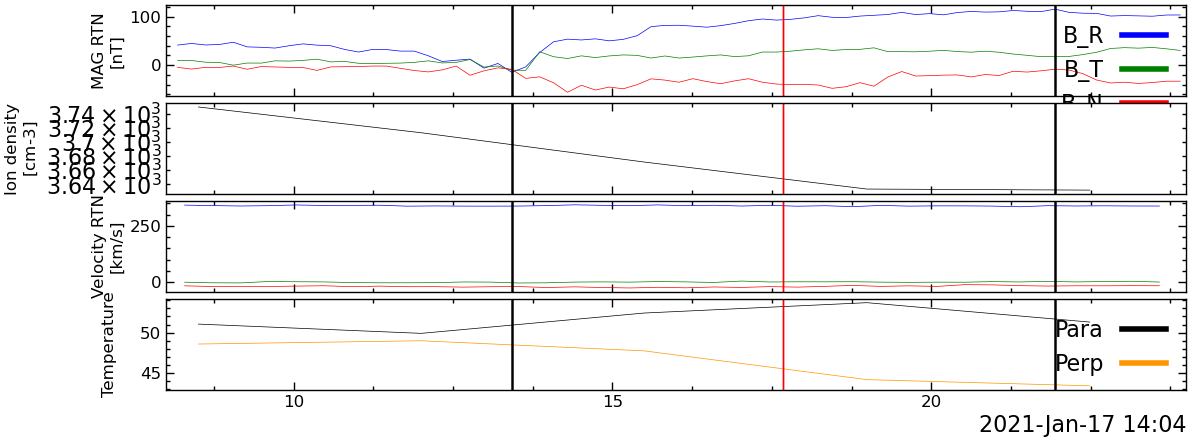

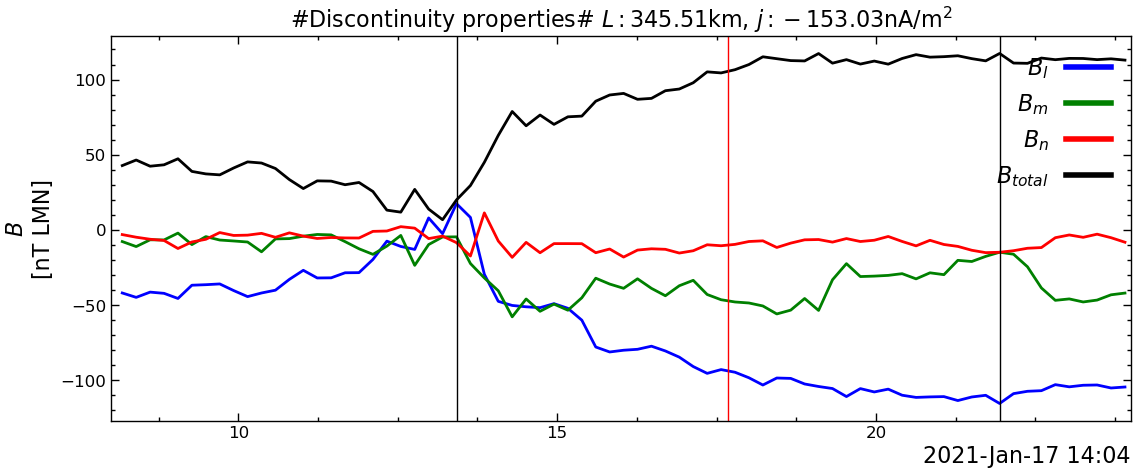

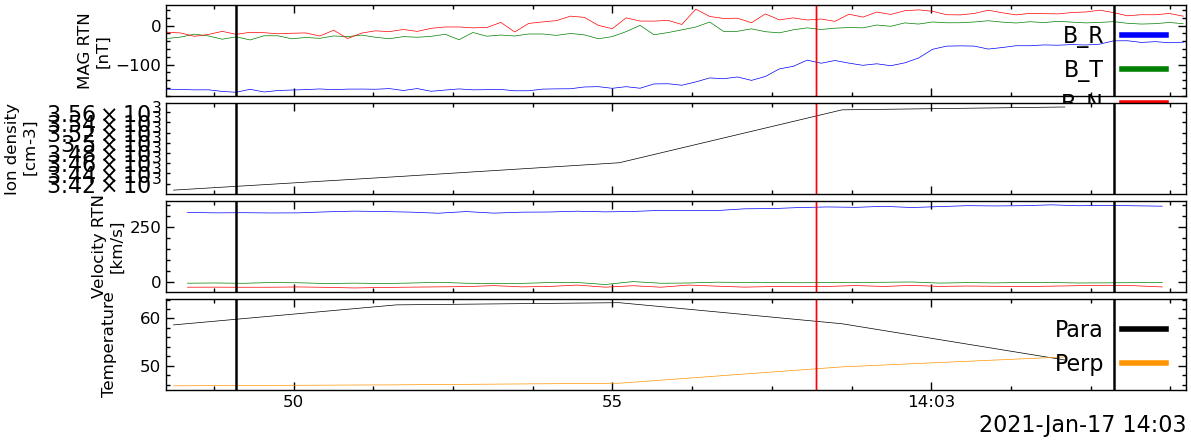

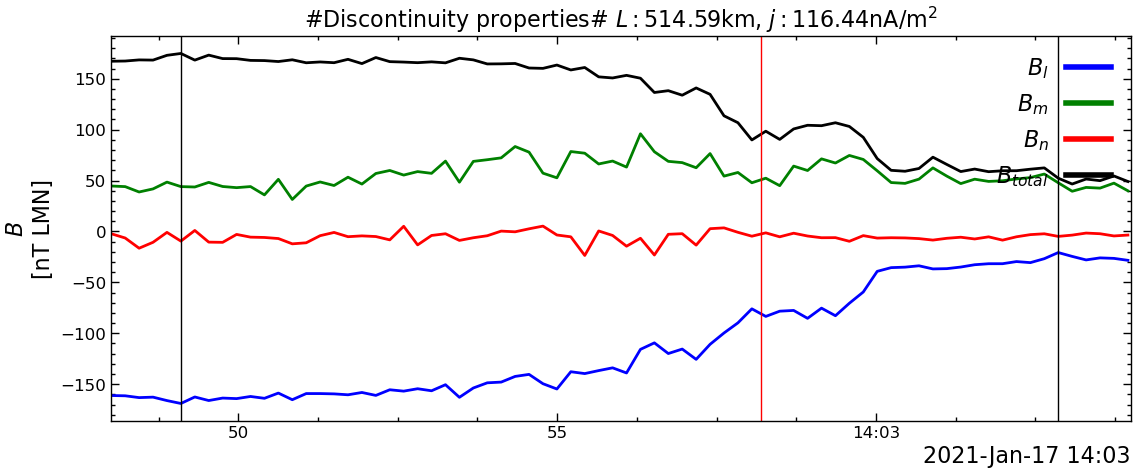

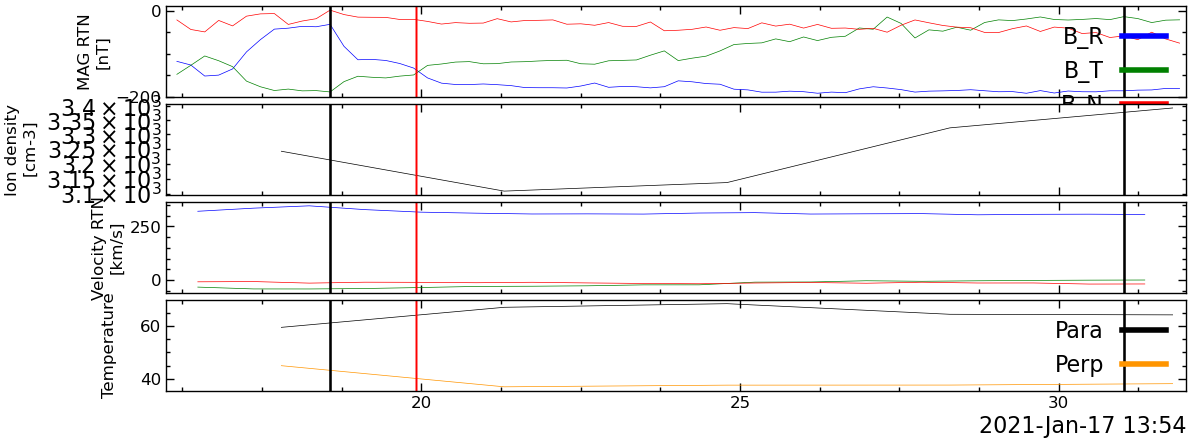

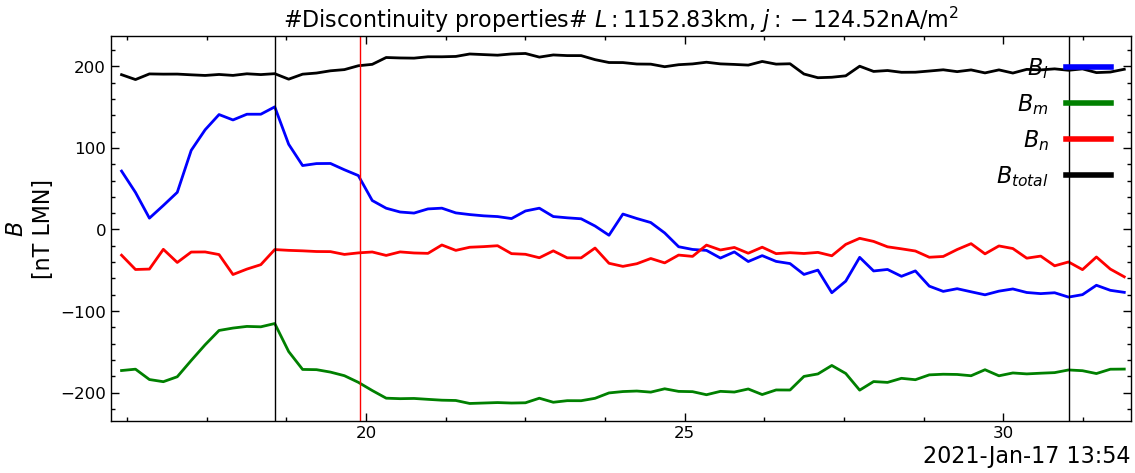

In [21]:
#| layout-ncol=2
for event in events.head().rows(named=True):
    plot_event(event, tnames2plot)
    plot_candidate_tplot(event)